In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from pprint import pprint
plt.rcParams.update({'font.size': 20, 'figure.figsize': (6, 6)})

In [6]:
df = pd.read_csv('data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.drop(['PassengerId','Ticket','Name', 'Cabin'], axis=1, inplace=True)

### Basic Visualization

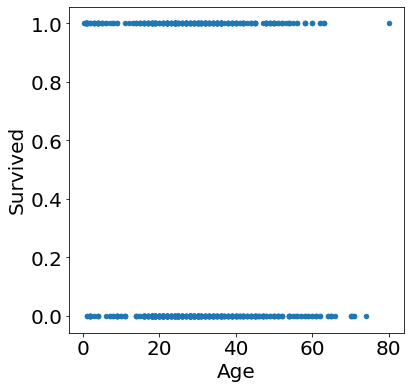

In [8]:
df.plot(kind='scatter', x='Age', y='Survived')

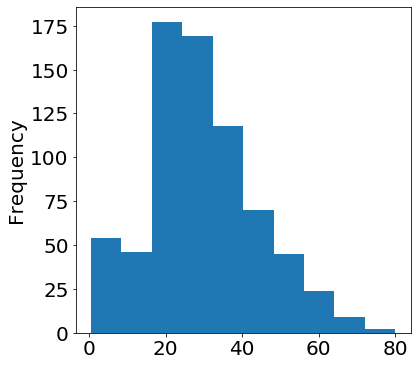

In [9]:
df['Age'].plot(kind='hist')

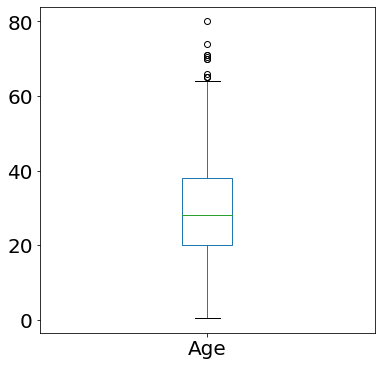

In [10]:
df['Age'].plot(kind='box')

# # REMOVING OUTLIER USING BOX PLOT
# Q1 = df['AVG'].quantile(0.25)
# Q3 = df['AVG'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
# df.loc[filter]  

### Basic data details

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [14]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Apply - Example

In [31]:
df['dependents'] = df.apply(lambda x: x['SibSp'] + x['Parch'] , axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,dependents
0,1,0,3,male,22.0,1,0,1
1,2,1,1,female,38.0,1,0,1
2,3,1,3,female,26.0,0,0,0
3,4,1,1,female,35.0,1,0,1
4,5,0,3,male,35.0,0,0,0


### GroupBy - Example

In [5]:
df['indicator'] = 1 
grp = df.groupby('Sex')['indicator'].count().rename('total').reset_index()
df = df.merge(grp, on='Sex')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,indicator,total
0,1,0,3,male,22.0,1,0,1,577
1,5,0,3,male,35.0,0,0,1,577
2,6,0,3,male,NaN,0,0,1,577
3,7,0,1,male,54.0,0,0,1,577
4,8,0,3,male,2.0,3,1,1,577


### Transform - Example

In [11]:
df['gender_total'] = df.groupby('Sex')['PassengerId'].transform('count')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,gender_total
0,1,0,3,male,22.0,1,0,577
1,2,1,1,female,38.0,1,0,314
2,3,1,3,female,26.0,0,0,314
3,4,1,1,female,35.0,1,0,314
4,5,0,3,male,35.0,0,0,577


### Feature Engineering

In [ ]:
# Analyzstion
print(df[''])

### Sklearn

In [8]:
train_col = df.columns.to_list()
train_col.remove('Survived')
X = df[train_col]
y = df['Survived']

cat_columns = ['Pclass', 'Sex', 'Embarked']
# cat_columns = ['Sex']
num_columns = [col for col in X.columns.to_list() if col not in cat_columns]

In [9]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
num_transofrmer = Pipeline(
    steps=[('imputer' , SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler())]
)
cat_transformer = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder())]
)
col_transformer = ColumnTransformer(
    transformers=[
        ('num', num_transofrmer, num_columns),
        ('cat', cat_transformer, cat_columns)]
)
X = col_transformer.fit_transform(X)

In [19]:
classifier_dict = {
    #'SVM' : SVC(),
    # 'neural_network': MLPClassifier(),
    'rand_forest': RandomForestClassifier(),
    'adaboost' : AdaBoostClassifier(),
    # 'knn': KNeighborsClassifier()
}

hyperparameter_dict = {
    'SVM' : {
        'kernel': ['rbf'], 'C': [1, 100], 'gamma' : ['scale']
    },
    'neural_network': {
        'hidden_layer_sizes' : [150], 'learning_rate_init': [0.001, 0.0001], 
        'solver' : ['sgd', 'adam'], 'max_iter' : [1000], 'alpha' : [0.01]
    },
    'rand_forest': {
        'n_estimators' : [25, 50, 100]
    },
    'adaboost' : {
        'n_estimators' : [25, 50, 100]
    },
    'knn': {
        'n_neighbors' : [3, 5, 10], 'weights' : ['uniform', 'distance']
    }
}

In [20]:
cls_cv_scores = {}
for cls_name, cls in classifier_dict.items():
    print("Processing: " + str(cls_name))
    cv = GridSearchCV(cls, param_grid= hyperparameter_dict[cls_name], scoring='accuracy', cv=5)
    cv.fit(X,y)
    print("CV Results")
    print("Best score: " + str(cv.best_score_))
    cls_cv_scores[cls_name] = (cv.best_estimator_, cv.best_score_)
    # cv_best_score_manually = np.mean(cross_val_score(cv.best_estimator_, X, y, cv=5, scoring='accuracy'))

Processing: rand_forest
CV Results
Best score: 0.8024691358024691
Processing: adaboost
CV Results
Best score: 0.813692480359147


In [21]:
pprint(cls_cv_scores)

{'adaboost': (AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
              0.813692480359147),
 'rand_forest': (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
                 0.8024691358024691)}


In [16]:
model = Pipeline(
    steps=[('transformer', col_transformer) , ('cls', cls_cv_scores['neural_network'][0])]
)

In [21]:
test_df = pd.read_csv('data/titanic/test.csv')
test_df['Survived'] = model.predict(test_df)
#test_df.columns = [col.lower() for col in test_df]
#test_df.rename(columns={'passengerid' : 'PassengerId'}, inplace=True)

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
pclass         418 non-null int64
name           418 non-null object
sex            418 non-null object
age            332 non-null float64
sibsp          418 non-null int64
parch          418 non-null int64
ticket         418 non-null object
fare           417 non-null float64
cabin          91 non-null object
embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [23]:
test_df.to_csv('data/titanic/predict.csv', index=False, columns=['PassengerId', 'Survived'])